In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(30, 18))

<Figure size 3000x1800 with 0 Axes>

## Preparação e análise exploratória de dados
1. Ler arquivo de join do HIVE;
2. Inserir headers
3. Eliminar campos desnecessários
4. Separar entre treino e teste conforme planilha básica

### Ler arquivo de join gerado pelo HIVE

In [2]:
headers_basico = ['cpf_hash', 'safra', 'tempo_cpf', 'dist_centro_cidade', 'orientacao_sexual', 'religiao', 
                  'dist_zona_risco', 'qtd_endereco', 'qtd_email', 'qtd_celular', 'celular_procon', 'qtd_fone_fixo', 
                  'tel_fixo_procon', 'target']

In [3]:
headers_renda = ['HS_CPF2', 'estimativa_renda', 'qtd_declaracao_isenta', 'qtd_irpf_10', 'qtd_irpf_restituir_10', 
                 'qtd_irpf_pagar_10', 'restituicao_agencia_alta_renda', 'bolsa_familia', 'anos_ultima_restituicao', 
                 'anos_ultima_declaracao', 'anos_ultima_declaracao_pagar']

In [4]:
headers_empresarial = ['HS_CPF3', 'indice_emprego', 'porte_empregador', 'socio_empresa', 'funcionario_publico', 
                       'segmentacao', 'segmentacao_cobranca', 'segmentacao_ecommerce', 'segmentacao_financeira', 
                       'segmentacao_telecom']

In [5]:
headers_familiar = ['HS_CPF4', 'qtd_pessoas_casa', 'menor_renda_casa', 'maior_renda_casa', 'soma_renda_casa', 
                    'media_renda_casa', 'maior_idade_casa', 'menor_idade_casa', 'media_idade_casa', 'indice_menor_idade', 
                   'indice_cobranca_baixo', 'indice_cobranca_medio', 'indice_cobranca_alto', 'segmentacao_fin_baixa', 
                   'segmentacao_fin_media', 'segmentacao_fin_alta', 'bolsa_familia_casa', 'funcionario_publico_casa']

In [6]:
headers_regional = ['HS_CPF5', 'idade_media_cep', 'percent_masc_cep', 'percent_fem_cep', 'percent_analfabeto_cep', 
                   'percent_primario_cep', 'percent_fundamental_cep', 'percent_medio_cep', 'percent_superior_cep', 
                   'percent_mestrado_cep', 'percent_doutorado_cep', 'percent_bolsa_familia_cep', 
                   'percent_func_publico_cep', 'media_renda_cep', 'pib_municipio', 'qtd_utilitario_municipio', 
                   'qtd_automovel_municipio', 'qtd_caminhao_municipio', 'qtd_camionete_municipio', 'qtd_moto_municipio',
                   'percent_populacao_zona_urbana', 'idh_municipio']

In [7]:
headers = headers_basico + headers_empresarial + headers_familiar + headers_regional + headers_renda

In [8]:
df = pd.read_csv('datasets/score.csv', sep=';', names=headers)
df.head()

,cpf_hash,safra,tempo_cpf,dist_centro_cidade,orientacao_sexual,religiao,dist_zona_risco,qtd_endereco,qtd_email,qtd_celular,...,estimativa_renda,qtd_declaracao_isenta,qtd_irpf_10,qtd_irpf_restituir_10,qtd_irpf_pagar_10,restituicao_agencia_alta_renda,bolsa_familia,anos_ultima_restituicao,anos_ultima_declaracao,anos_ultima_declaracao_pagar
0,217413,TESTE,12,3347,HETERO,CATOLICA,962,1,0,1,...,900,0,0,0,0,0,0,-9998,-9998,-9998
1,659712,TESTE,20,0,HETERO,EVANGELICA,133905,1,0,1,...,400,2,0,0,0,0,0,-9998,12,-9998
2,558518,TESTE,27,2210,HETERO,CATOLICA,171360,1,1,3,...,6000,0,0,0,0,0,0,-9998,-9998,-9998
3,622015,TESTE,10,0,HETERO,CATOLICA,153737,1,0,3,...,1000,0,0,0,0,0,0,-9998,-9998,-9998
4,241872,TREINO,26,3162,HETERO,EVANGELICA,225,2,1,1,...,20000,0,4,3,0,0,0,8,4,-9998


In [9]:
print(df.shape)

(438924, 75)


In [10]:
list(df.columns)

['cpf_hash',
 'safra',
 'tempo_cpf',
 'dist_centro_cidade',
 'orientacao_sexual',
 'religiao',
 'dist_zona_risco',
 'qtd_endereco',
 'qtd_email',
 'qtd_celular',
 'celular_procon',
 'qtd_fone_fixo',
 'tel_fixo_procon',
 'target',
 'HS_CPF3',
 'indice_emprego',
 'porte_empregador',
 'socio_empresa',
 'funcionario_publico',
 'segmentacao',
 'segmentacao_cobranca',
 'segmentacao_ecommerce',
 'segmentacao_financeira',
 'segmentacao_telecom',
 'HS_CPF4',
 'qtd_pessoas_casa',
 'menor_renda_casa',
 'maior_renda_casa',
 'soma_renda_casa',
 'media_renda_casa',
 'maior_idade_casa',
 'menor_idade_casa',
 'media_idade_casa',
 'indice_menor_idade',
 'indice_cobranca_baixo',
 'indice_cobranca_medio',
 'indice_cobranca_alto',
 'segmentacao_fin_baixa',
 'segmentacao_fin_media',
 'segmentacao_fin_alta',
 'bolsa_familia_casa',
 'funcionario_publico_casa',
 'HS_CPF5',
 'idade_media_cep',
 'percent_masc_cep',
 'percent_fem_cep',
 'percent_analfabeto_cep',
 'percent_primario_cep',
 'percent_fundamental_cep

### Clean

In [11]:
# Removendo hash_cpf duplicadas
df.drop('HS_CPF2', inplace=True, axis=1)
df.drop('HS_CPF3', inplace=True, axis=1)
df.drop('HS_CPF4', inplace=True, axis=1)
df.drop('HS_CPF5', inplace=True, axis=1)

In [13]:
# Removendo dados sensiveis
df.drop('tempo_cpf', inplace=True, axis=1)
df.drop('dist_centro_cidade', inplace=True, axis=1)
df.drop('orientacao_sexual', inplace=True, axis=1)
df.drop('religiao', inplace=True, axis=1)
df.drop('dist_zona_risco', inplace=True, axis=1)
df.drop('qtd_endereco', inplace=True, axis=1)
df.drop('qtd_email', inplace=True, axis=1)
df.drop('qtd_celular', inplace=True, axis=1)
df.drop('celular_procon', inplace=True, axis=1)
df.drop('qtd_fone_fixo', inplace=True, axis=1)
df.drop('tel_fixo_procon', inplace=True, axis=1)
df.drop('bolsa_familia', inplace=True, axis=1)
df.drop('anos_ultima_restituicao', inplace=True, axis=1)
df.drop('anos_ultima_declaracao_pagar', inplace=True, axis=1)
df.drop('qtd_pessoas_casa', inplace=True, axis=1)
df.drop('maior_idade_casa', inplace=True, axis=1)
df.drop('menor_idade_casa', inplace=True, axis=1)
df.drop('media_idade_casa', inplace=True, axis=1)
df.drop('indice_menor_idade', inplace=True, axis=1)
df.drop('indice_cobranca_baixo', inplace=True, axis=1)
df.drop('indice_cobranca_medio', inplace=True, axis=1)
df.drop('indice_cobranca_alto', inplace=True, axis=1)
df.drop('segmentacao_fin_baixa', inplace=True, axis=1)
df.drop('segmentacao_fin_media', inplace=True, axis=1)
df.drop('segmentacao_fin_alta', inplace=True, axis=1)
df.drop('bolsa_familia_casa', inplace=True, axis=1)
df.drop('funcionario_publico_casa', inplace=True, axis=1)
df.drop('idade_media_cep', inplace=True, axis=1)
df.drop('percent_masc_cep', inplace=True, axis=1)
df.drop('percent_fem_cep', inplace=True, axis=1)
df.drop('percent_analfabeto_cep', inplace=True, axis=1)
df.drop('percent_primario_cep', inplace=True, axis=1)
df.drop('percent_fundamental_cep', inplace=True, axis=1)
df.drop('percent_medio_cep', inplace=True, axis=1)
df.drop('percent_superior_cep', inplace=True, axis=1)
df.drop('percent_mestrado_cep', inplace=True, axis=1)
df.drop('percent_doutorado_cep', inplace=True, axis=1)
df.drop('percent_bolsa_familia_cep', inplace=True, axis=1)
df.drop('percent_func_publico_cep', inplace=True, axis=1)
df.drop('qtd_utilitario_municipio', inplace=True, axis=1)
df.drop('qtd_automovel_municipio', inplace=True, axis=1)
df.drop('qtd_caminhao_municipio', inplace=True, axis=1)
df.drop('qtd_camionete_municipio', inplace=True, axis=1)
df.drop('qtd_moto_municipio', inplace=True, axis=1)
df.drop('percent_populacao_zona_urbana', inplace=True, axis=1)

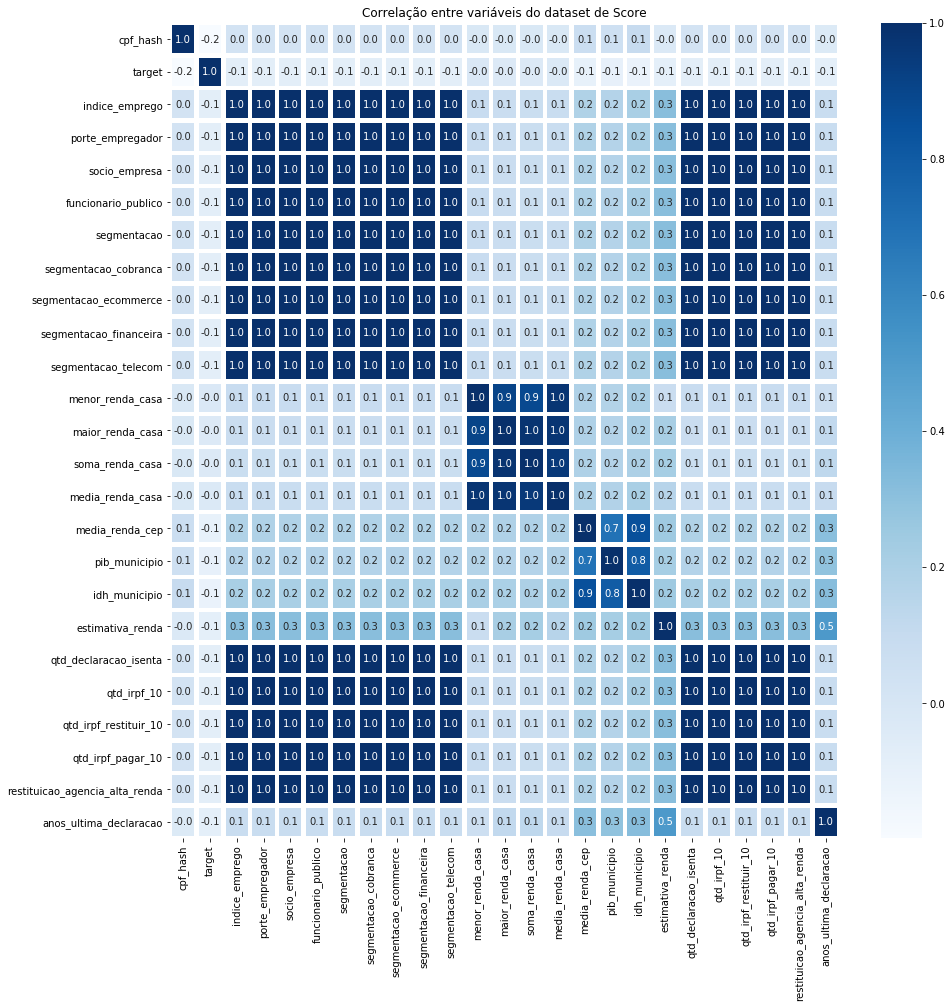

In [14]:
# Correlação entre variaveis
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1f',
            cmap='Blues',
            linewidths=3.5,
            ax=ax)
plt.title('Correlação entre variáveis do dataset de Score')
plt.show()

In [ ]:
df